1 torch.Size([328, 120])
2 torch.Size([328, 100])
5 torch.Size([328, 80])
8 torch.Size([328, 70])
11 torch.Size([328, 64])
12 torch.Size([328, 70])
15 torch.Size([328, 80])
18 torch.Size([328, 100])
21 torch.Size([328, 120])
24 torch.Size([328, 12])


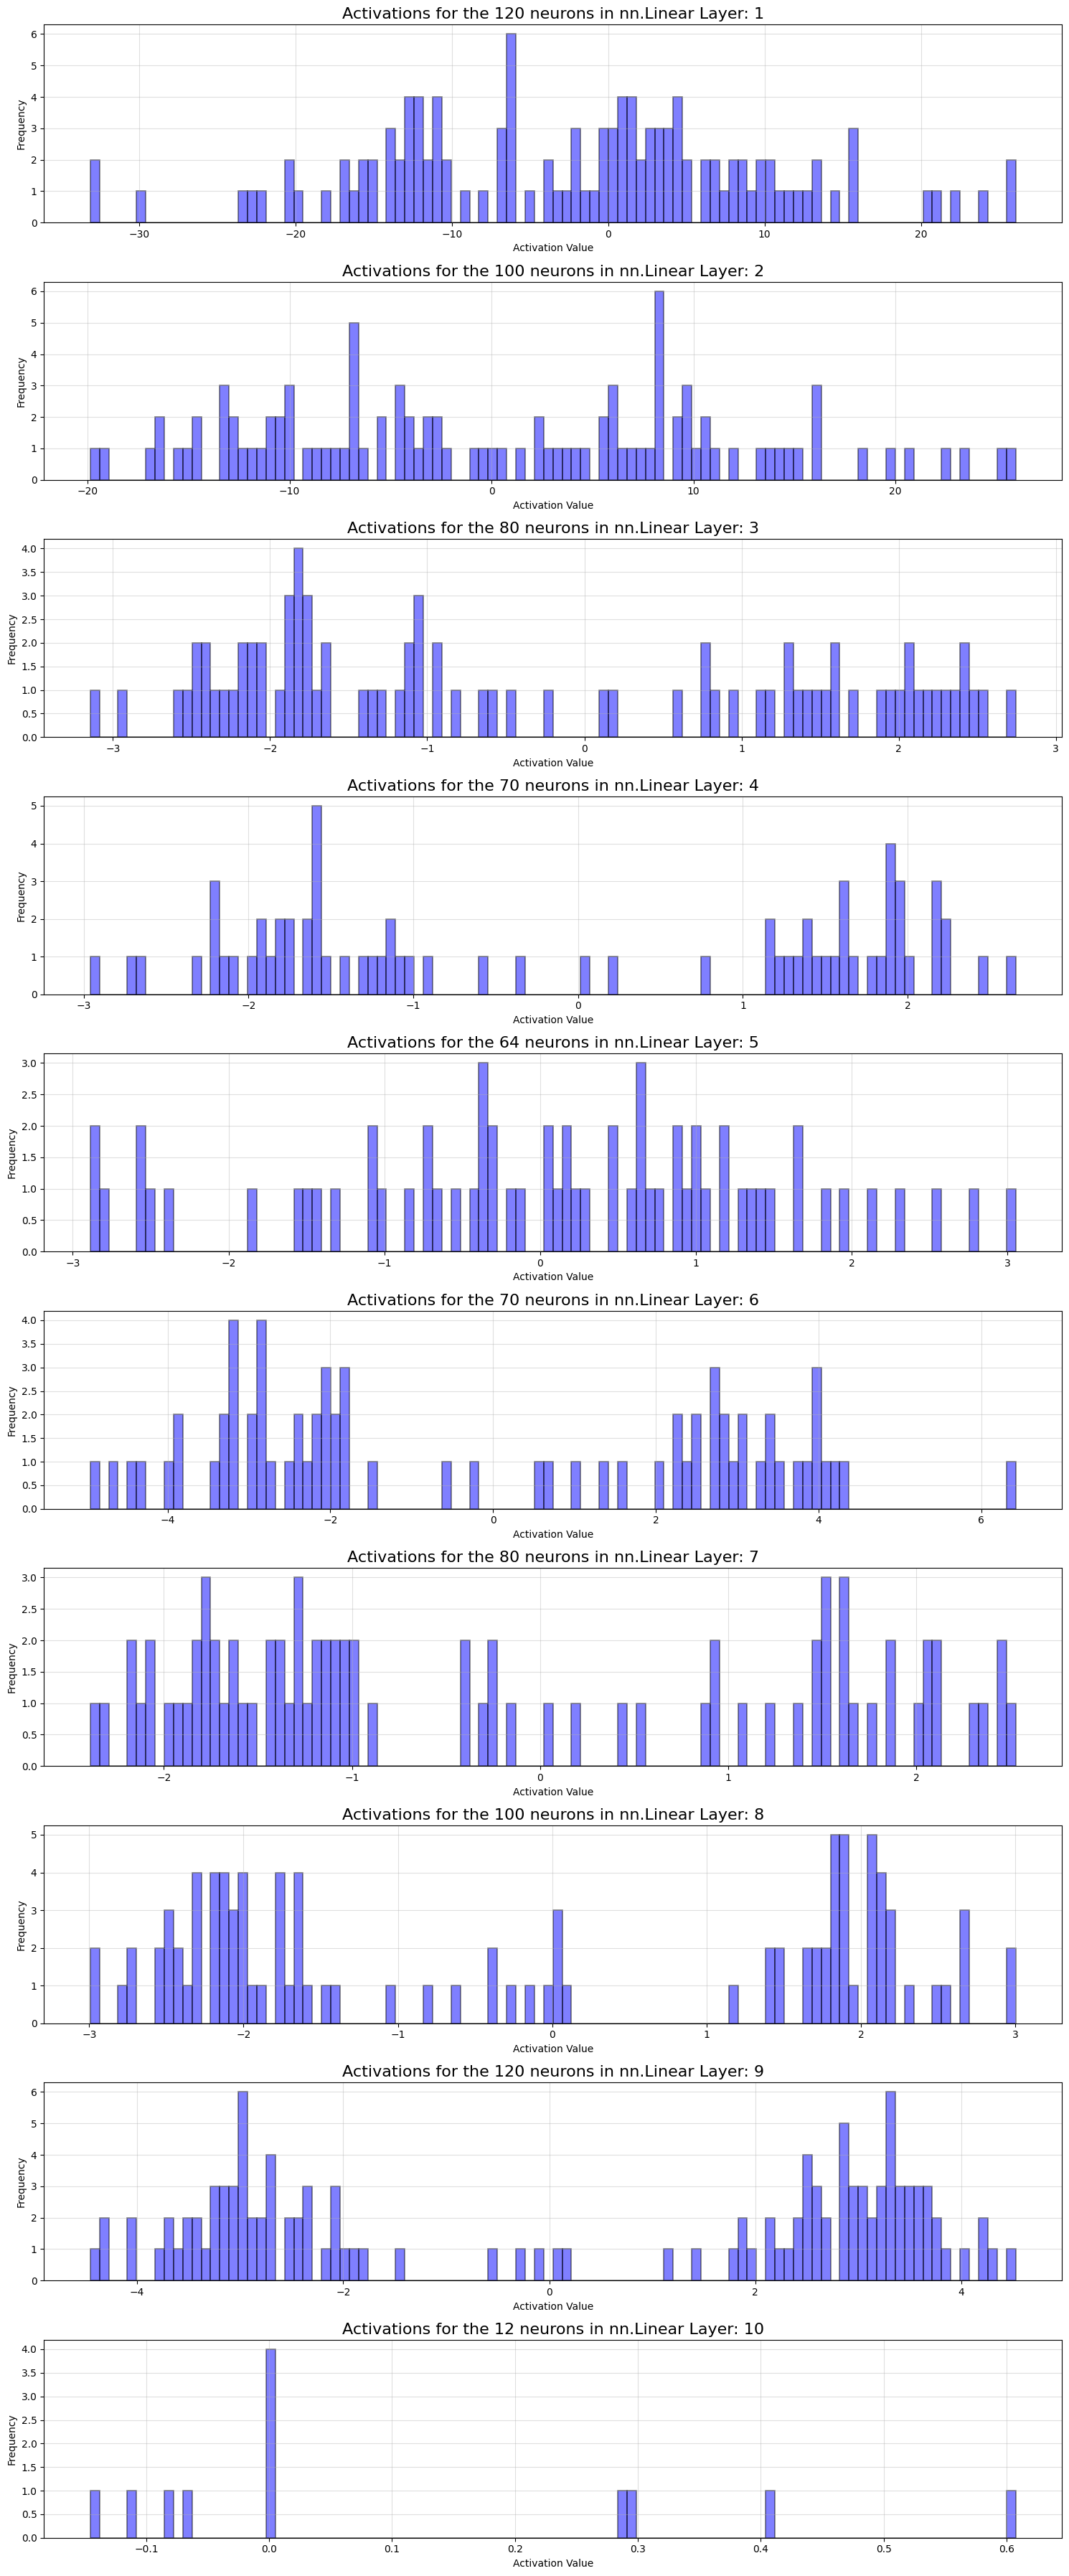

In [53]:
import torch
import os
import matplotlib.pyplot as plt

def load_activations_from_file(epoch, output_dir):
    # Load the activations from the file named 'activations_epoch_{epoch}.pt'
    activations_path = os.path.join(output_dir, f'activations_epoch_{epoch}.pt')
    return torch.load(activations_path)

def plot_activations_histograms(activations, file_number):
    # Check how many keys there are in the dictionary
    num_layers = len(activations.keys())

    # Plot each feature in a separate subplot
    fig, axs = plt.subplots(num_layers, 1, figsize=(15, 36))

    # Plot the activations for each linear layer
    layer_index = 0 
    for layer_number, activation_data in activations.items():
        # Assuming the activation_data is a tensor of shape (batch_size, num_features)        
        axs[layer_index].set_title(f"Activations for the {activation_data.shape[1]} neurons in nn.Linear Layer: {layer_index+1}", fontsize=16)
        axs[layer_index].hist(activation_data[file_number, :].numpy(), bins=100, alpha=0.5, color='blue', edgecolor='black', linewidth=1.2,  hatch='//', fill=True)
        axs[layer_index].set_xlabel("Activation Value")
        axs[layer_index].set_ylabel("Frequency")
        axs[layer_index].grid(alpha=0.4)

        layer_index += 1   
    plt.tight_layout()
    #plt.savefig(output_dir + '\Activation Histograms\Activation Histograms for File ' + str(file_number) + '.png')
    plt.show()


# Replace 'output_dir' and 'num_epochs' with the appropriate values
output_dir = r'A:\Users\Ada\GitHub\Multiplane_Particle_Detector_AI_Resolution_Boost\Results\Test 151 Leaky ReLU - Training Results\Activation Data\\'
epoch_num = 2
num_epochs = 1
file_number = 0

for epoch in range(epoch_num, epoch_num+num_epochs):
    activations = load_activations_from_file(epoch, output_dir)
    #iterate through all the keys in dictionary and print the shape of the tensor
    for key in activations.keys():
        print(key, activations[key].shape)
    
    plot_activations_histograms(activations, file_number)
